In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('HR_Analytics.csv')

In [3]:
data.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

In [5]:
# Check for missing values
print(data.isnull().sum())

# Handle missing values (example: fill with mean for numerical, mode for categorical)
for col in data.columns:
    if data[col].dtype == 'object':  # Categorical column
        data[col].fillna(data[col].mode()[0], inplace=True)
    elif data[col].dtype in ['int64', 'float64']: #Numerical column
        data[col].fillna(data[col].mean(), inplace=True)

#Verify if missing values are handled
data.isnull().sum()

EmpID                        0
Age                          0
AgeGroup                     0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
SalarySlab                   0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
Training

<ipython-input-5-733caf0f8791>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)
<ipython-input-5-733caf0f8791>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

,0
EmpID,0
Age,0
AgeGroup,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0


In [6]:
data.shape

(1480, 38)

In [7]:
# Checking for Duplicates
if data.duplicated().sum() > 0:
    print(f"Found {data.duplicated().sum()} duplicates. Removing them...")
    data = data.drop_duplicates()

Found 7 duplicates. Removing them...


In [8]:
# EDA: Basic Statistics
print("\nDataset Description:")
print(data.describe())


Dataset Description:
               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1473.000000  1473.000000       1473.000000  1473.000000         1473.0   
mean     36.917176   802.659878          9.196877     2.911066            1.0   
std       9.130690   403.245460          8.107754     1.024612            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1473.000000              1473.000000  1473.000000     1473.000000   
mean      1026.975560                 2.723693    65.833673        2.729803   
std        

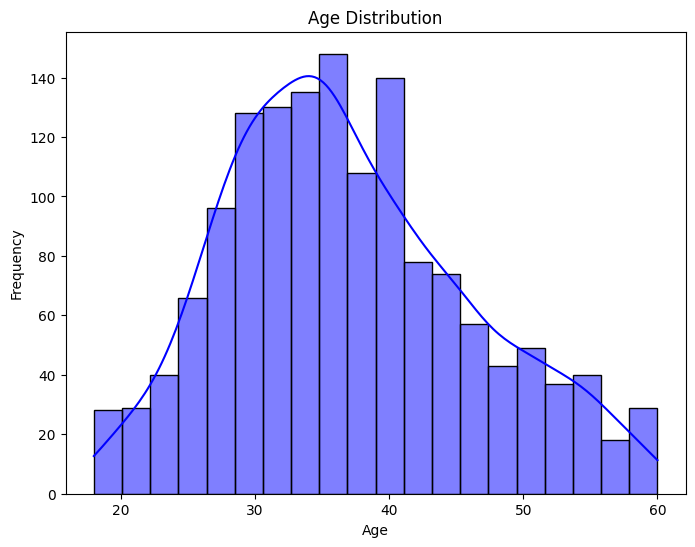

In [9]:
# Distribution of a Numeric Column (e.g., 'Age')
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<ipython-input-10-53804a7759d9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Department', data=data, palette='viridis')


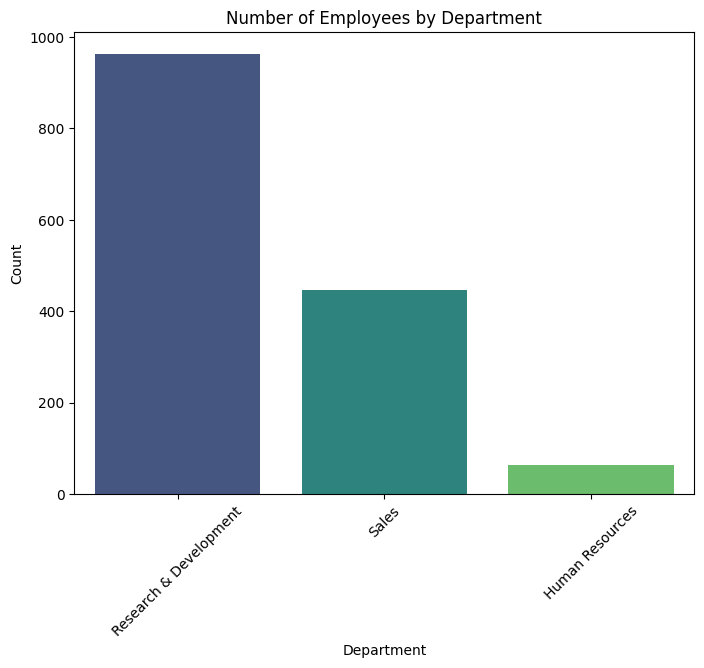

In [10]:
# Count Plot for a Categorical Column (e.g., 'Department')
plt.figure(figsize=(8, 6))
sns.countplot(x='Department', data=data, palette='viridis')
plt.title('Number of Employees by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<ipython-input-11-d51f73eb5d1b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Department', y='Age', data=data, palette='Set2')


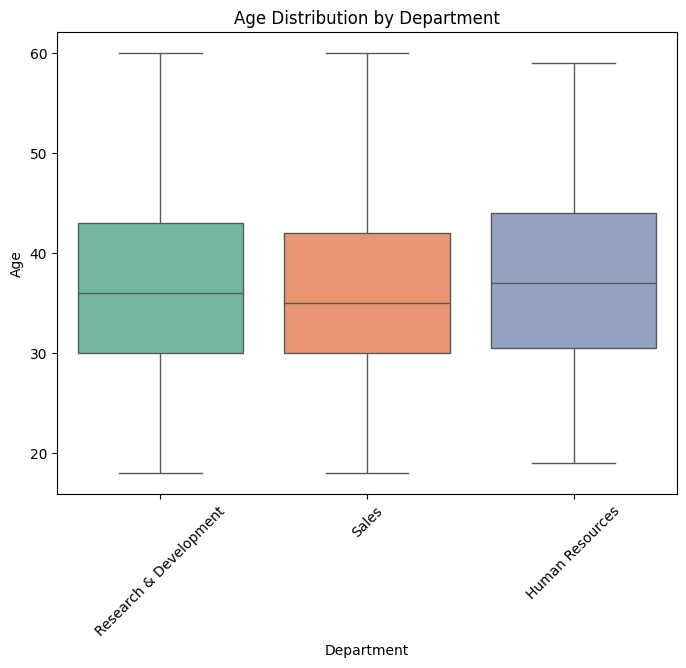

In [11]:
# Boxplot of a Numeric Column Grouped by a Category
plt.figure(figsize=(8, 6))
sns.boxplot(x='Department', y='Age', data=data, palette='Set2')
plt.title('Age Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

<ipython-input-13-a8f94fd1f48b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='HourlyRate', data=avg_salary, palette='husl')


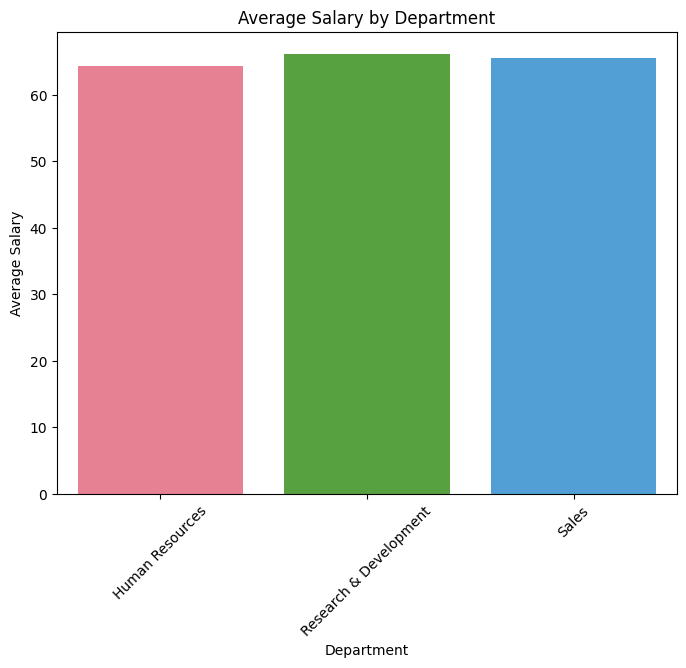

In [13]:
# Bar Plot of Average Salary by Department
if 'HourlyRate' in data.columns:
    avg_salary = data.groupby('Department')['HourlyRate'].mean().reset_index()
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Department', y='HourlyRate', data=avg_salary, palette='husl')
    plt.title('Average Salary by Department')
    plt.xlabel('Department')
    plt.ylabel('Average Salary')
    plt.xticks(rotation=45)
    plt.show()

<ipython-input-16-d159c0e5cb5f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition', data=data, palette='Set2')


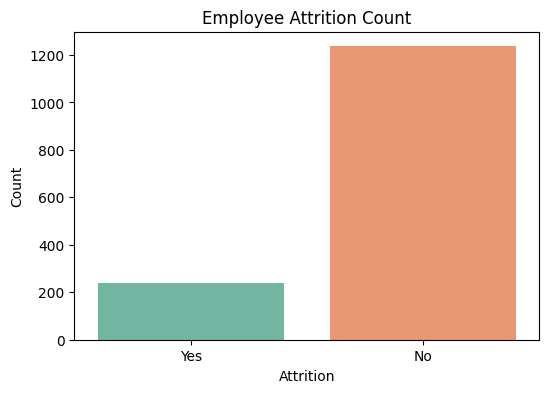

In [16]:
# Visualization 1: Attrition Count
plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition', data=data, palette='Set2')
plt.title('Employee Attrition Count')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

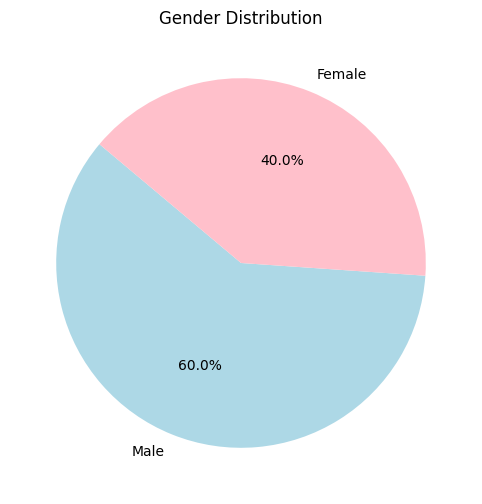

In [14]:
# Pie Chart for Categorical Column (e.g., 'Gender')
plt.figure(figsize=(8, 6))
data['Gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=['lightblue', 'pink'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

<ipython-input-17-6e5fb4d0adc3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='MonthlyIncome', data=data, palette='coolwarm')


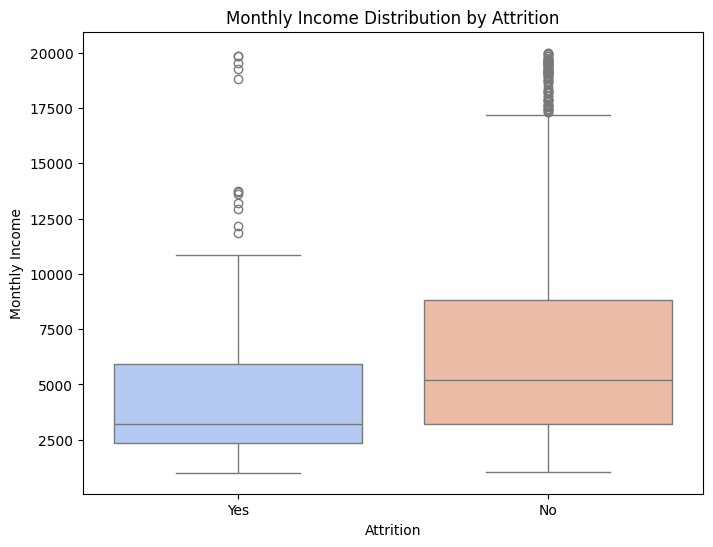

In [17]:
# Monthly Income vs Attrition
plt.figure(figsize=(8, 6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=data, palette='coolwarm')
plt.title('Monthly Income Distribution by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.show()

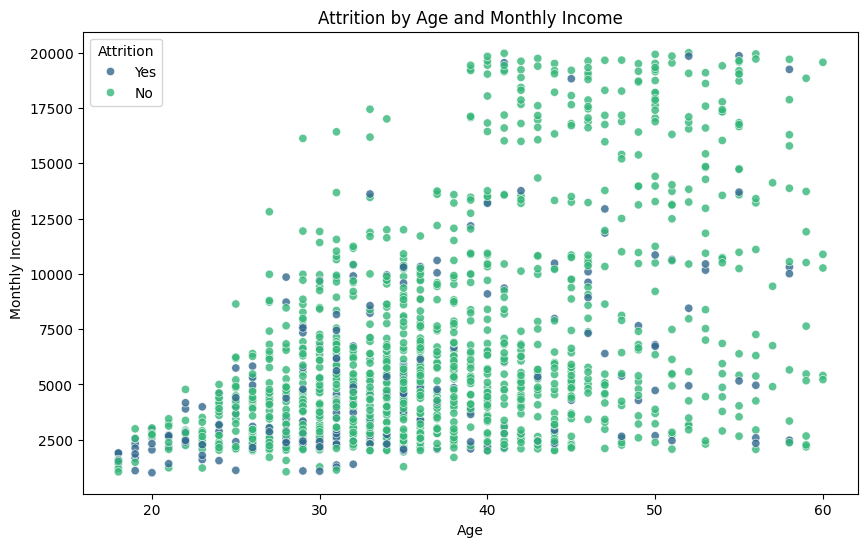

In [20]:
# Attrition by Age and Monthly Income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='MonthlyIncome', hue='Attrition', data=data, palette='viridis', alpha=0.8)
plt.title('Attrition by Age and Monthly Income')
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.show()

In [21]:
# Save the cleaned data for Tableau use
cleaned_file_path = 'Cleaned_HR_Analytics.csv'
data.to_csv(cleaned_file_path, index=False)